In [1]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Define a unified dictionary for all style settings.
DEFAULT_STYLE = {
    "style": "ticks",
    "context": "paper",
    "palette": "muted",
    "rc": {
        "axes.labelsize": 16,
        "axes.titlesize": 18,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "legend.title_fontsize": 16,
        "axes.grid": True,
        "grid.linestyle": "--",
        "grid.alpha": 0.5,
        "axes.edgecolor": "black",
        "axes.linewidth": 1,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.size": 5,
        "ytick.major.size": 5,
        "xtick.minor.size": 3,
        "ytick.minor.size": 3,
        "xtick.color": "black",
        "ytick.color": "black",
        "xtick.major.width": 1,
        "ytick.major.width": 1,
        "savefig.dpi": 300,
    }
}


def set_default_style(style_settings=DEFAULT_STYLE):
    """
    Apply the Seaborn style based on the provided settings.
    
    This uses sns.set_theme() to combine style, context, palette, and rc parameters.
    """
    sns.set_theme(
        style=style_settings.get("style", "ticks"),
        context=style_settings.get("context", "paper"),
        palette=style_settings.get("palette", "muted"),
        rc=style_settings.get("rc", {})
    )


def serialize_palette(palette):
    """
    Ensure the palette is JSON serializable.
    
    If palette is a list of RGB tuples, convert each color to a hex string.
    """
    if isinstance(palette, list):
        new_palette = []
        for color in palette:
            if isinstance(color, (tuple, list)):
                new_palette.append(to_hex(color))
            else:
                new_palette.append(color)
        return new_palette
    return palette


def save_style(file_path, style_settings=DEFAULT_STYLE):
    """
    Save the current style settings to a JSON file.
    
    Parameters:
        file_path (str): Path to the JSON file.
        style_settings (dict): Dictionary containing style, context, palette, and rc parameters.
    """
    # Create a copy so we can modify the palette if needed.
    settings_to_save = style_settings.copy()
    settings_to_save["palette"] = serialize_palette(settings_to_save.get("palette"))
    
    with open(file_path, "w") as f:
        json.dump(settings_to_save, f, indent=4)
    print(f"Style settings saved to {file_path}")


def load_style(file_path):
    """
    Load style settings from a JSON file and apply them.
    
    If the file is not found, the default style is applied.
    
    Parameters:
        file_path (str): Path to the JSON file.
    """
    if not os.path.exists(file_path):
        print(f"Style file {file_path} not found. Using default style.")
        set_default_style()
        return

    with open(file_path, "r") as f:
        loaded_settings = json.load(f)
    set_default_style(loaded_settings)
    print(f"Style settings loaded from {file_path}")


style_file = "seaborn_style.json"
save_style(style_file)

Style settings saved to seaborn_style.json


Style settings loaded from seaborn_style.json


Text(0.5, 1.0, 'Example Scientific Plot')

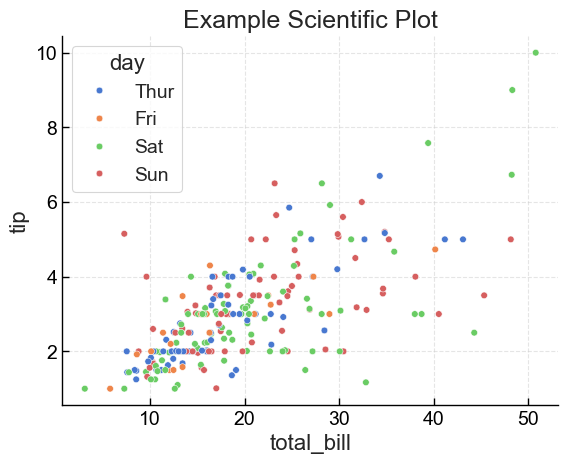

In [2]:
style_file = "seaborn_style.json"
load_style(style_file)

tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
sns.despine()
plt.title("Example Scientific Plot")